In [1]:
#Vamos importar as bibliotecas que vamos utilizar nesse desafio

import pandas as pd
import MySQLdb
import sqlalchemy

## Informando diretório do arquivo

In [44]:
caminho = "C:\\Users\\Jessica e Ricardo\\Desktop\\Bootcamp IGTI\\Módulo 2\\desafio\\dataset\\dados_jogadores.csv"

In [45]:
df_jogo = pd.read_csv(caminho, sep=';', encoding = 'latin-1')
df_jogo

jogador     genero data_nascimento           jogo       pais  \
0      jogador 1  Masculino      03/09/1990           Dama      Chile   
1      Jogador 2   Feminino      01/05/1986  Jogo da velha      Chile   
2      Jogador 3  Masculino      04/10/1964  Jogo da velha     Brasil   
3      Jogador 4  Masculino      28/09/1979  Jogo da velha  Argentina   
4      Jogador 5  Masculino      03/09/1978           Dama    Uruguai   
..           ...        ...             ...            ...        ...   
494  Jogador 495   Feminino      03/06/1974           Dama      Chile   
495  Jogador 496  Masculino      09/02/1959           Dama      Chile   
496  Jogador 497  Masculino      06/01/1962  Jogo da velha  Argentina   
497  Jogador 498  Masculino      28/09/1958  Jogo da velha      Chile   
498  Jogador 499   Feminino      08/10/2004  Jogo da velha   Paraguai   

     num_vitorias  num_derrotas  total_partidas  
0            14.0           0.0            14.0  
1            39.0          20.0            59.0  
2            26.0           3.0            29.0  
3             9.0          72.0            81.0  
4             1.0          54.0            55.0  
..            ...           ...             ...  
494          52.0          28.0            80.0  
495          13.0          51.0            64.0  
496          57.0           NaN            80.0  
497           5.0           3.0             8.0  
498           1.0          86.0            87.0  

[499 rows x 8 columns]

Observamos que temos:

499 linhas e 8 colunas e valores 'NAN'

In [46]:
# verificando os tipos dos dados
df_jogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jogador          499 non-null    object 
 1   genero           499 non-null    object 
 2   data_nascimento  499 non-null    object 
 3   jogo             499 non-null    object 
 4   pais             499 non-null    object 
 5   num_vitorias     491 non-null    float64
 6   num_derrotas     494 non-null    float64
 7   total_partidas   491 non-null    float64
dtypes: float64(3), object(5)
memory usage: 31.3+ KB


## Alterando o formado da data para tratalharmos no banco

Percebemos que a coluna data_nascimento esta como objeto e não como data

In [47]:
df_jogo['data_nascimento'].astype('datetime64')

0     1990-03-09
1     1986-01-05
2     1964-04-10
3     1979-09-28
4     1978-03-09
         ...    
494   1974-03-06
495   1959-09-02
496   1962-06-01
497   1958-09-28
498   2004-08-10
Name: data_nascimento, Length: 499, dtype: datetime64[ns]

In [48]:
df_jogo['data_nascimento'] = df_jogo['data_nascimento'].astype('datetime64')

In [49]:
#verificando alterações

df_jogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   jogador          499 non-null    object        
 1   genero           499 non-null    object        
 2   data_nascimento  499 non-null    datetime64[ns]
 3   jogo             499 non-null    object        
 4   pais             499 non-null    object        
 5   num_vitorias     491 non-null    float64       
 6   num_derrotas     494 non-null    float64       
 7   total_partidas   491 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 31.3+ KB


## Verificando valores nulos

In [50]:
df_jogo.loc[:, df_jogo.isnull().any()].columns

Index(['num_vitorias', 'num_derrotas', 'total_partidas'], dtype='object')

Observamos que exitem valores nulos em 3 colunas

## Contando os valores nulos

In [51]:
df_jogo.isnull().sum()

jogador            0
genero             0
data_nascimento    0
jogo               0
pais               0
num_vitorias       8
num_derrotas       5
total_partidas     8
dtype: int64

In [52]:
#Verificando a porcentagem de valores nulos

df_jogo.isnull().sum()/(len(df_jogo))/100

jogador            0.00000
genero             0.00000
data_nascimento    0.00000
jogo               0.00000
pais               0.00000
num_vitorias       0.00016
num_derrotas       0.00010
total_partidas     0.00016
dtype: float64

## Visualizando dados ausente
valores missingno

In [59]:
!pip install missingno

<AxesSubplot:>

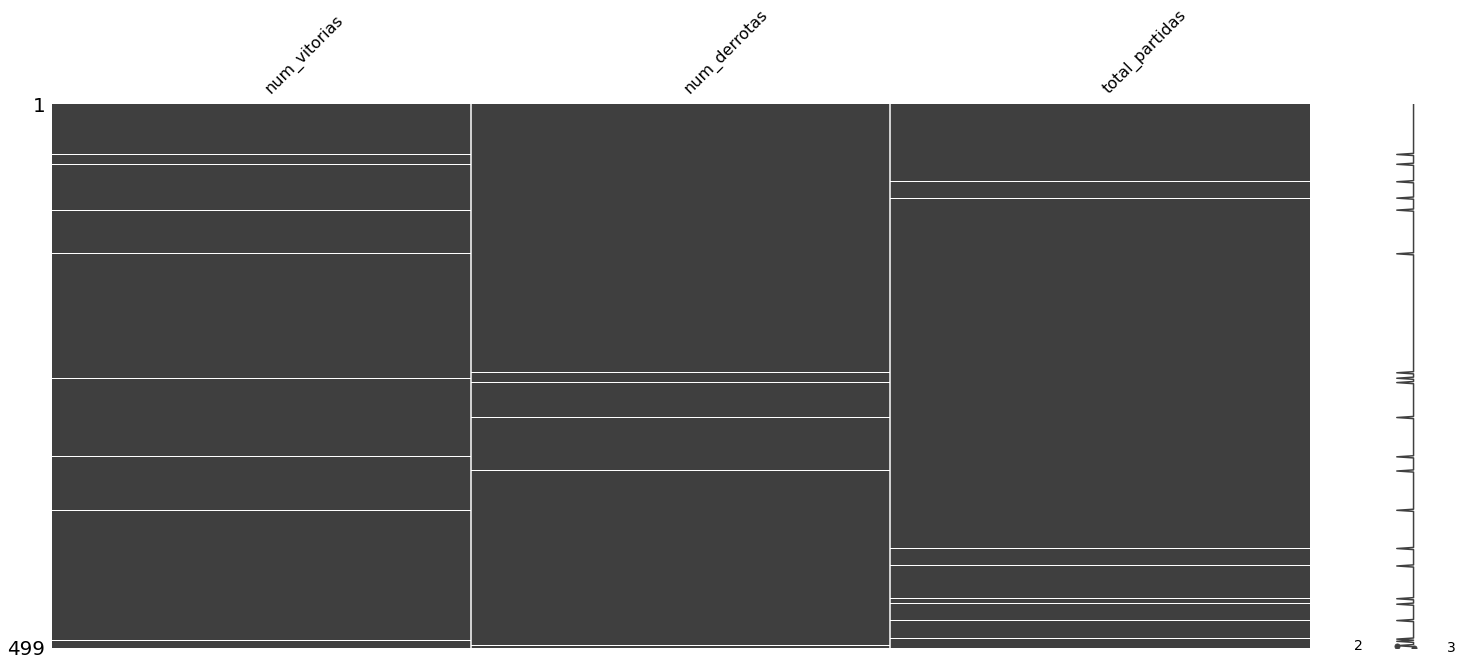

In [54]:
import missingno

# Plotando todas as linhas que estão ausentes nas colunas
df_ausentes = df_jogo.columns[df_jogo.isnull().any()].tolist()
missingno.matrix(df_jogo[df_ausentes]) #montando a matriz

* Observamos que cada linha na horizontal representa um dado ausente e sua posição

## Visualizando os registros que são nulos (NAN)

In [55]:
df_jogo[pd.isnull(df_jogo).any(axis=1)]

jogador     genero data_nascimento           jogo       pais  \
46    Jogador 47  Masculino      1978-01-31           Dama    Uruguai   
55    Jogador 56   Feminino      1959-01-27           Dama   Paraguai   
71    Jogador 72  Masculino      2005-03-27           Dama   Paraguai   
86    Jogador 87   Feminino      1975-05-25           Dama  Argentina   
97    Jogador 98   Feminino      1980-04-16           Dama   Paraguai   
137  Jogador 138   Feminino      1963-02-16  Jogo da velha      Chile   
246  Jogador 247   Feminino      1954-02-14           Dama  Argentina   
251  Jogador 252  Masculino      1985-08-18  Jogo da velha      Chile   
255  Jogador 256   Feminino      2000-09-28         Xadrez      Chile   
287  Jogador 288  Masculino      1952-01-02         Xadrez     Brasil   
323  Jogador 324   Feminino      1994-03-23           Dama     Brasil   
336  Jogador 337  Masculino      1996-06-13           Dama  Argentina   
372  Jogador 373   Feminino      2000-06-24         Xadrez   Paraguai   
407  Jogador 408   Feminino      1970-11-23         Xadrez     Brasil   
423  Jogador 424  Masculino      1998-08-21           Dama   Paraguai   
453  Jogador 454   Feminino      2000-10-21           Dama   Paraguai   
458  Jogador 459  Masculino      1999-06-17  Jogo da velha  Argentina   
473  Jogador 474   Feminino      1977-10-22         Xadrez    Uruguai   
490  Jogador 491  Masculino      1981-05-27           Dama  Argentina   
492  Jogador 493   Feminino      2001-09-21  Jogo da velha    Uruguai   
496  Jogador 497  Masculino      1962-06-01  Jogo da velha  Argentina   

     num_vitorias  num_derrotas  total_partidas  
46            NaN          68.0            85.0  
55            NaN          29.0            80.0  
71           29.0           7.0             NaN  
86           80.0           6.0             NaN  
97            NaN           1.0            10.0  
137           NaN          28.0            44.0  
246          33.0           NaN            89.0  
251           NaN          27.0            28.0  
255           1.0           NaN            73.0  
287           3.0           NaN            17.0  
323           NaN           1.0             7.0  
336          36.0           NaN            64.0  
372           NaN          49.0            60.0  
407          54.0          28.0             NaN  
423          47.0          30.0             NaN  
453          15.0          42.0             NaN  
458          23.0          50.0             NaN  
473          24.0           4.0             NaN  
490          16.0           1.0             NaN  
492           NaN           6.0            25.0  
496          57.0           NaN            80.0

## Tratando os dados ausente (NAN)

In [56]:
df_ausentes = df_jogo[pd.isnull(df_jogo).any(axis=1)]

In [57]:
df_ausentes[:5]

jogador     genero data_nascimento  jogo       pais  num_vitorias  \
46  Jogador 47  Masculino      1978-01-31  Dama    Uruguai           NaN   
55  Jogador 56   Feminino      1959-01-27  Dama   Paraguai           NaN   
71  Jogador 72  Masculino      2005-03-27  Dama   Paraguai          29.0   
86  Jogador 87   Feminino      1975-05-25  Dama  Argentina          80.0   
97  Jogador 98   Feminino      1980-04-16  Dama   Paraguai           NaN   

    num_derrotas  total_partidas  
46          68.0            85.0  
55          29.0            80.0  
71           7.0             NaN  
86           6.0             NaN  
97           1.0            10.0

In [58]:
#utilizando o metédo 'fillna' do 'pandas' para substituir o valor ausente. Exmplo: número, string.

df_ausentes['num_vitorias'].fillna('ausente')

46     ausente
55     ausente
71        29.0
86        80.0
97     ausente
137    ausente
246       33.0
251    ausente
255        1.0
287        3.0
323    ausente
336       36.0
372    ausente
407       54.0
423       47.0
453       15.0
458       23.0
473       24.0
490       16.0
492    ausente
496       57.0
Name: num_vitorias, dtype: object

## Atribuindo valores aos dados ausentes atraves de uma expressão matemática

Perceba que o número de vitórias é a subtração entre o total de partidas e o número de derrotas.

In [62]:
df_ausentes['num_vitorias'].fillna(df_ausentes['total_partidas'] - df_ausentes['num_derrotas'])

46     17.0
55     51.0
71     29.0
86     80.0
97      9.0
137    16.0
246    33.0
251     1.0
255     1.0
287     3.0
323     6.0
336    36.0
372    11.0
407    54.0
423    47.0
453    15.0
458    23.0
473    24.0
490    16.0
492    19.0
496    57.0
Name: num_vitorias, dtype: float64

## Tratando na base de dados df_jogos

In [63]:
#Atribuindo valores para a coluna num_vitórias

df_jogo['num_vitorias'].fillna(df_jogo['total_partidas'] - df_jogo['num_derrotas'])

0      14.0
1      39.0
2      26.0
3       9.0
4       1.0
       ... 
494    52.0
495    13.0
496    57.0
497     5.0
498     1.0
Name: num_vitorias, Length: 499, dtype: float64

In [64]:
#Atribuindo valores para a coluna num_derrotas

df_jogo['num_derrotas'].fillna(df_jogo['total_partidas'] - df_jogo['num_vitorias'])

0       0.0
1      20.0
2       3.0
3      72.0
4      54.0
       ... 
494    28.0
495    51.0
496    23.0
497     3.0
498    86.0
Name: num_derrotas, Length: 499, dtype: float64

In [65]:
#Atribuindo valores para a coluna num_partidas

df_jogo['total_partidas'].fillna(df_jogo['num_vitorias'] + df_jogo['num_derrotas'])

0      14.0
1      59.0
2      29.0
3      81.0
4      55.0
       ... 
494    80.0
495    64.0
496    80.0
497     8.0
498    87.0
Name: total_partidas, Length: 499, dtype: float64

In [66]:
# Atribuindo os valos as respectivas colunas

df_jogo['num_vitorias'] = df_jogo['num_vitorias'].fillna(df_jogo['total_partidas'] - df_jogo['num_derrotas'])
df_jogo['num_derrotas'] = df_jogo['num_derrotas'].fillna(df_jogo['total_partidas'] - df_jogo['num_vitorias'])
df_jogo['total_partidas'] = df_jogo['total_partidas'].fillna(df_jogo['num_vitorias'] + df_jogo['num_derrotas'])


In [67]:
df_jogo.isnull().sum()

jogador            0
genero             0
data_nascimento    0
jogo               0
pais               0
num_vitorias       0
num_derrotas       0
total_partidas     0
dtype: int64

# Modelo de entidade e relacionamento

Realizando conexão com o banco de dados

In [68]:
user = 'root'
password = ''
host = 'localhost'
database = 'jogosdb' #schema

string_conexao = f'mysql://{user}:{password}@{host}/{database}'    
string_conexao #testar a string de conexão com o banco de dados. 

'mysql://root:@localhost/jogosdb'

a string é composta pelo usuario de acesso ao banco, a senha, o caminho do banco e o schema que vai ser utilizado.

In [69]:
#conexão com o banco de dados

engine = sqlalchemy.create_engine(string_conexao)
conn = engine.connect()

Criado o modelo de entidade e relacionamento, o próximo passo é preparar os dados para inserir nas tabelas

## Eliminando regristros duplicados de jogos

In [70]:
jogos = list(df_jogo.jogo.unique())

In [71]:
jogos

['Dama', 'Jogo da velha', 'Xadrez']

## Eliminando regristros duplicados de paises

In [72]:
paises = list(df_jogo.pais.unique())

In [73]:
paises

['Chile', 'Brasil', 'Argentina', 'Uruguai', 'Paraguai']

# Inserindo registros no banco de dados MySQL

## inserindo dados de jogos

In [83]:
#============= INSERT NO BANCO - TABELA jogo  ===============

for jogoo in jogos:
    try:
        query = f"""insert into jogo (nome_jogo)
                     values ('{jogoo}')"""
        conn.execute(query)
        print(f"Registro inserido com sucesso: {jogoo}")
    except Exception as e:
        print(f"Não foi possível inserir o regristro {jogoo}. O erro foi encontrado foi: {e}")    

Registro inserido com sucesso: z


## Inserindo dados de paises

In [84]:
#============= INSERT NO BANCO - TABELA pais  ===============

for paiss in paises:
    try:
        query = f"""insert into pais (nome_pais)
                     values ('{paiss}')"""
        conn.execute(query)
        print(f"Registro inserido com sucesso: {paiss}")
    except Exception as e:
        print(f"Não foi possível inserir o regristro {paiss}. O erro foi encontrado foi: {e}")    

Registro inserido com sucesso: i
